<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/lab_14_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

This exercise gives an implementation of a perceptron.

Perceptron
    - A perceptron has only input layers and output layers.
    - No hidden layers.
    - It uses step function as activation function.
    - Perceptron output is +1 or -1.
    - Perceptron Learning rule is used to update the weights and bias.



## 1. Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline


## 2 - Perceptron model
Perceptron

- A perceptron has only input layers and output layers.
- No hidden layers.
- It uses step function as activation function.
- Perceptron output is +1 or -1.
- Perceptron Learning rule is used to update the weights and bias.


**Mathematically**:

For one example $x^{(i)}$:
$$z^{(i)} =  W x^{(i)} + b  \tag{1}$$

The activation function used in Perceptron is given as:

$$a^{(i)} = \begin{cases} 1 & \mbox{if } z(i) \ge 0 \\ -1 & \mbox{if } z(i) < 0   \end{cases}\tag{2}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows:
$$J = \frac{1}{m} \sum\limits_{i = 1}^{m}  \max \left( 0, - y^{(i)} x^{(i)} W \right)  \small \tag{3}$$


The updation of parameters is performed using the Perceptron Learning rule as follows:

If $x^{(i)}$ is misclassified
$$ W = W - \frac{\alpha}{2}  \sum\limits_{i = 1}^{m}\left(a^{(i)} - y^{(i)}\right) x^{(i)} \tag{4}$$
$$ b = b - \frac{\alpha}{2}  \sum\limits_{i = 1}^{m}\left(a^{(i)} - y^{(i)}\right)  \tag{5}$$

**Methodology**:

The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc).
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Update parameters (Perceptron Learning rule)


### (a) Define the neural network structure

In [2]:
# Define the neural network structure -- layer sizes

def initialize_sizes(X, Y):
    n_x = X.shape[1]
    # number for hidden layer = 0 for a perceptron
    n_y = Y.shape[1]
    size = {'n_x': n_x,
            'n_y': n_y}
    return size

### (b) Initialize the model's parameters

In [3]:
# initialize parameters or weights

def initialize_parameter(size):
    n_x = size['n_x']
    n_y = size['n_y']
    W = np.zeros((n_x, n_y))
    b = np.zeros((n_y, 1))
    parameters = {"W": W,
                  "b": b}
    return parameters

### (c) Loop:  forward propagation,  Compute loss,  Update parameters

In [4]:
# forward propagation


def forward_propagation(X, Y, parameters, iterations):
    learning_rate = 0.1
    cost_history = []
    W = parameters['W']
    b = parameters['b']
    m = X.shape[0]

    # loop
    for i in range(1, iterations):
        # Implement Forward Propagation to calculate actiation A (probabilites)
        Z = np.dot(X, W) + b
        A = np.sign(Z)

        # compute cost
        prod = np.multiply( A,Y )
        maximum = np.maximum(prod, 0)
        cost = np.sum(maximum) * (-1/m)
        float(np.squeeze(cost))
        cost_history.append(cost)

        # update weights
        # if cost <= 0 :
        W = W - learning_rate /2 * np.dot(X.T, A-Y)
        b = b - learning_rate /2 * np.sum(A-Y)

        cache = {'A': A,
                 'cost_history' : cost_history,
                 'W': W,
                 'b': b}

    return cache


### (d) Visualization

In [5]:
# visualise the input
def visualize(X, Y):
    colors = ("red", "blue")
    labels = Y.flatten()
    plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=labels,
                cmap = matplotlib.colors.ListedColormap(colors) )
    plt.title('Scatter plot')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.xticks([0,1])
    plt.yticks(np.arange(0, 1.1, step=1))
    plt.show()

In [6]:
# visualize the predicted values and the decision boundary

def decision_boundary(X, Y, parameters):
    A = parameters['A']
    W = parameters['W']
    b = parameters['b']

    # plot the data points
    plt.scatter(X[:, 0], X[:, 1], alpha=1, c=Y.flatten(), cmap=plt.cm.rainbow)

    # decision boundary line
    n=20
    x = np.linspace(-0.1, +1, num=n).reshape(n,1)
    #print(x)
    y = -(np.dot(x, W[0]/W[1]) + b /W[1]).T
    #print(y)
    plt.plot(x, y, c='green', label='Decision boundary')


    plt.title('Scatter plot')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.show()


In [7]:
# plot the cost function
def plot_cost_function(result):
    plt.plot(result['cost_history'])
    plt.title('Cost Function')
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()

## 3. Implementation of OR gate

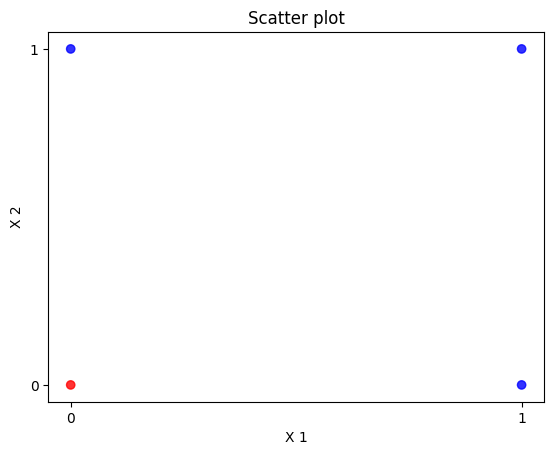

In [8]:
# This example is an implementation of OR gate

# Number of input neurons = 2
# Number of output neurons = 1

# Training input sample
X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])

# Training output sample
# output represented as <-1,1,1,1>

Y = np.array([[-1],[1],[1],[1]])

visualize(X,Y)

In [9]:
print('Before training')
size = initialize_sizes(X, Y)
print(size)


weights = initialize_parameter(size)
print('W = ', weights['W'])
print('b = ', weights['b'])

print('\n Training... \n')
result = forward_propagation(X, Y, weights, 100)

print('After training')
print('A = ', result['A'])
print('W = ', result['W'])
print('b = ', result['b'])

Before training
{'n_x': 2, 'n_y': 1}
W =  [[0.]
 [0.]]
b =  [[0.]]

 Training... 

After training
A =  [[-1.]
 [ 1.]
 [ 1.]
 [ 1.]]
W =  [[0.1]
 [0.1]]
b =  [[-0.05]]


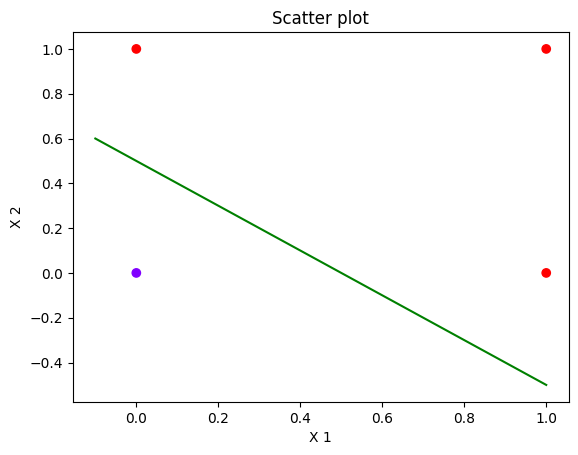

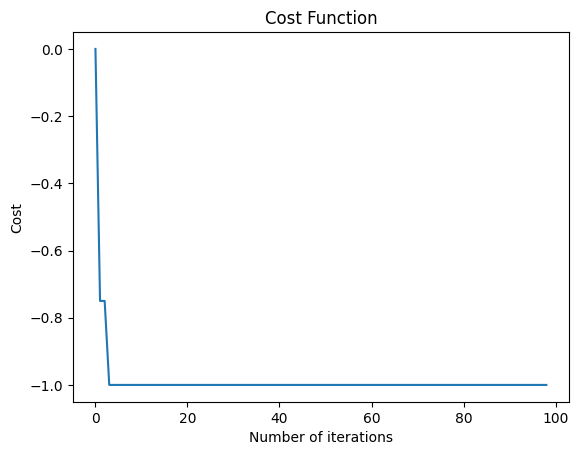

In [10]:
# Visualization of decision boundary and loss function
decision_boundary(X, Y, result)
plot_cost_function(result)

In [11]:
# Compute accuracy

accuracy = np.mean( result['A'].flatten() == Y.flatten() )

print(accuracy * 100)

100.0


# Perceptron implementation of XOR

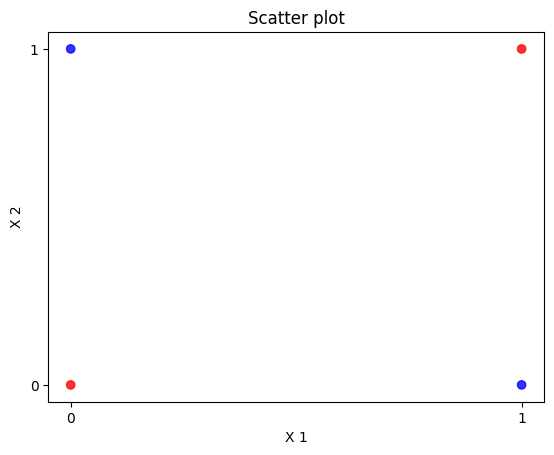

In [12]:
# This example is an implementation of XOR gate

# Number of input neurons = 2
# Number of output neurons = 1

# Training input sample
xor_X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])

# Training output sample
# outpur represented as <-1,1,1,-1>

xor_Y = np.array([[-1],[1],[1],[-1]])

visualize(xor_X, xor_Y)

In [13]:
print('Before training')
xor_size = initialize_sizes(xor_X, xor_Y)
print(xor_size)

xor_weights = {"W": -np.ones((size['n_x'], size['n_y'])),
            "b": -np.ones((size['n_y'], 1)) }

print('W = ', xor_weights['W'])
print('b = ', xor_weights['b'])


print('\n Training... \n')
xor_result = forward_propagation(xor_X, xor_Y, xor_weights, 25)

print('After training')
print('A = ', xor_result['A'])
print('W = ', xor_result['W'])
print('b = ', xor_result['b'])

Before training
{'n_x': 2, 'n_y': 1}
W =  [[-1.]
 [-1.]]
b =  [[-1.]]

 Training... 

After training
A =  [[1.]
 [1.]
 [1.]
 [1.]]
W =  [[-0.1]
 [-0.1]]
b =  [[-8.32667268e-17]]


In [14]:
# Compute accuracy

accuracy = np.mean( xor_result['A'].flatten() == xor_Y.flatten() )

print(accuracy * 100)

50.0


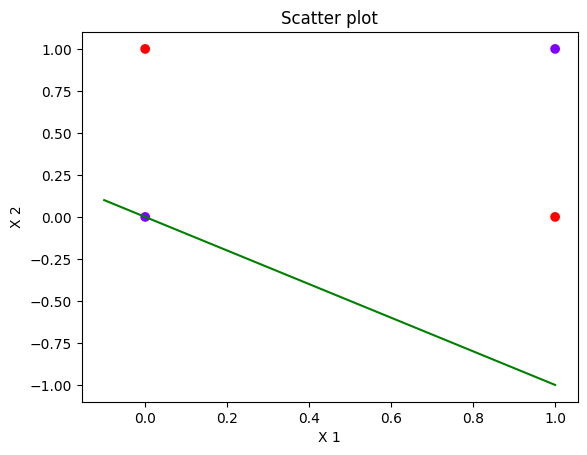

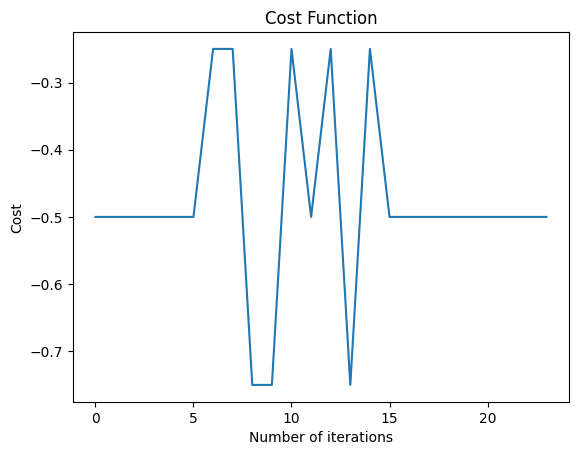

In [15]:
# Visualization of decision boundary and loss function
decision_boundary(xor_X, xor_Y, xor_result)
plot_cost_function(xor_result)